<a href="https://colab.research.google.com/github/ssprasad-cyber/Road-accident-detection-system/blob/main/accident_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!nvidia-smi

Wed Feb  4 14:15:47 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   68C    P0             29W /   70W |    1146MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
# Install YOLOv8
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.8 MB/s eta 0:00:00


In [6]:
from ultralytics import YOLO
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [13]:
import kagglehub
path = kagglehub.dataset_download("ckay16/accident-detection-from-cctv-footage")

Using Colab cache for faster access to the 'accident-detection-from-cctv-footage' dataset.


In [14]:
DATASET_PATH = "/kaggle/input/accident-detection-from-cctv-footage/data"

In [15]:
for split in ["train", "val", "test"]:
    for cls in ["Accident", "Non Accident"]:
        path = os.path.join(DATASET_PATH, split, cls)
        print(f"{path} → {len(os.listdir(path))} images")

# data size of 990 images

/kaggle/input/accident-detection-from-cctv-footage/data/train/Accident → 369 images
/kaggle/input/accident-detection-from-cctv-footage/data/train/Non Accident → 422 images
/kaggle/input/accident-detection-from-cctv-footage/data/val/Accident → 46 images
/kaggle/input/accident-detection-from-cctv-footage/data/val/Non Accident → 52 images
/kaggle/input/accident-detection-from-cctv-footage/data/test/Accident → 47 images
/kaggle/input/accident-detection-from-cctv-footage/data/test/Non Accident → 54 images


990

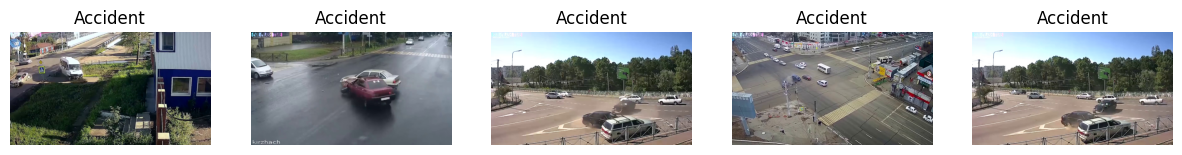

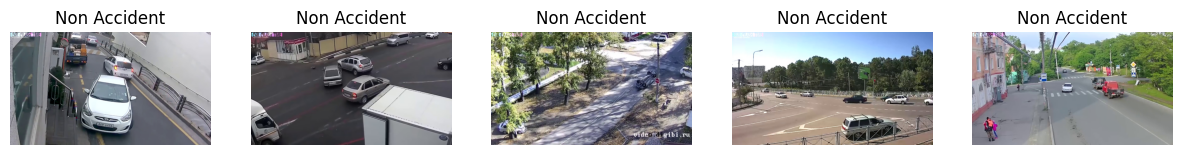

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
import random

def show_samples(split, cls, n=5):
    path = os.path.join(DATASET_PATH, split, cls)
    imgs = random.sample(os.listdir(path), n)

    plt.figure(figsize=(15,4))
    for i, img in enumerate(imgs):
        plt.subplot(1, n, i+1)
        plt.imshow(Image.open(os.path.join(path, img)))
        plt.axis("off")
        plt.title(cls)
    plt.show()

show_samples("train", "Accident")
show_samples("train", "Non Accident")


In [17]:
model = YOLO("yolov8s-cls.pt")


In [18]:
model.train(
    data=DATASET_PATH,
    epochs=30,
    imgsz=224,
    batch=32,
    patience=5,
    device=0
)


Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/accident-detection-from-cctv-footage/data, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True,

ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a97c0134fe0>
curves: []
curves_results: []
fitness: 0.9744898080825806
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9489796161651611, 'metrics/accuracy_top5': 1.0, 'fitness': 0.9744898080825806}
save_dir: PosixPath('/content/runs/classify/train')
speed: {'preprocess': 0.16655748979655055, 'inference': 0.9037090918373367, 'loss': 0.00018980612209389266, 'postprocess': 0.0003317755095961228}
task: 'classify'
top1: 0.9489796161651611
top5: 1.0

In [19]:
metrics = model.val()
print(metrics)


Ultralytics 8.4.11 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-cls summary (fused): 30 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
train: /kaggle/input/accident-detection-from-cctv-footage/data/train... found 791 images in 2 classes ✅ 
val: /kaggle/input/accident-detection-from-cctv-footage/data/val... found 98 images in 2 classes ✅ 
test: /kaggle/input/accident-detection-from-cctv-footage/data/test... found 100 images in 2 classes ✅ 
val: Fast image access ✅ (ping: 1.5±2.9 ms, read: 323.2±92.5 MB/s, size: 145.7 KB)
val: Scanning /kaggle/input/accident-detection-from-cctv-footage/data/val... 98 images, 0 corrupt: 100% ━━━━━━━━━━━━ 98/98 1.4Kit/s 0.1s
WARNING ⚠️ val: Cache directory /kaggle/input/accident-detection-from-cctv-footage/data is not writable, cache not saved.
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 7/7 4.7it/s 1.5s
                   all      0.949          1
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0

In [26]:
import os

test_accident_path = os.path.join(DATASET_PATH, "test", "Accident")
test_non_accident_path = os.path.join(DATASET_PATH, "test", "Non Accident")

def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff'))

# Get all image paths from the 'Accident' and 'Non Accident' subfolders, filtering for image files
accident_images = [os.path.join(test_accident_path, img) for img in os.listdir(test_accident_path) if is_image_file(img)]
non_accident_images = [os.path.join(test_non_accident_path, img) for img in os.listdir(test_non_accident_path) if is_image_file(img)]
all_test_images = accident_images + non_accident_images

test_results = model.predict(
    source=all_test_images, # Pass a list of image paths
    stream=False
)


0: 224x224 Accident 0.99, Non Accident 0.01, 0.7ms
1: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
2: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
3: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
4: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
5: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
6: 224x224 Accident 0.99, Non Accident 0.01, 0.7ms
7: 224x224 Accident 0.80, Non Accident 0.20, 0.7ms
8: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
9: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
10: 224x224 Accident 0.86, Non Accident 0.14, 0.7ms
11: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
12: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
13: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
14: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
15: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
16: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
17: 224x224 Accident 1.00, Non Accident 0.00, 0.7ms
18: 224x224 Non Accident 0.83, Accident 0.17, 0.7ms
19: 224x224 Accident 

The `test_results` object contains the predictions for each image. Let's iterate through them and print the predicted class and confidence.

In [27]:
for i, result in enumerate(test_results):
    # The 'probs' attribute contains probabilities for each class
    # result.names gives the class names corresponding to the probabilities
    # The top1 index gives the index of the most probable class
    predicted_class_index = result.probs.top1
    predicted_class_name = result.names[predicted_class_index]
    confidence = result.probs.top1conf.item() # .item() to get the scalar value

    # original_image_path is usually in result.path or can be inferred
    # For this example, let's just print the index and prediction
    print(f"Image {i+1}: Predicted class: {predicted_class_name}, Confidence: {confidence:.4f}")

Image 1: Predicted class: Accident, Confidence: 0.9919
Image 2: Predicted class: Accident, Confidence: 1.0000
Image 3: Predicted class: Accident, Confidence: 1.0000
Image 4: Predicted class: Accident, Confidence: 1.0000
Image 5: Predicted class: Accident, Confidence: 1.0000
Image 6: Predicted class: Accident, Confidence: 1.0000
Image 7: Predicted class: Accident, Confidence: 0.9920
Image 8: Predicted class: Accident, Confidence: 0.7989
Image 9: Predicted class: Accident, Confidence: 1.0000
Image 10: Predicted class: Accident, Confidence: 1.0000
Image 11: Predicted class: Accident, Confidence: 0.8589
Image 12: Predicted class: Accident, Confidence: 1.0000
Image 13: Predicted class: Accident, Confidence: 1.0000
Image 14: Predicted class: Accident, Confidence: 0.9999
Image 15: Predicted class: Accident, Confidence: 1.0000
Image 16: Predicted class: Accident, Confidence: 1.0000
Image 17: Predicted class: Accident, Confidence: 0.9999
Image 18: Predicted class: Accident, Confidence: 1.0000
I

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_true = []
y_pred = []

# Map class names to integers (e.g., 'Accident': 0, 'Non Accident': 1)
class_to_int = {v: k for k, v in model.names.items()}

# Populate y_true based on the original image lists
# Assuming accident_images come first, then non_accident_images
# This relies on the order in all_test_images being consistent with its construction
num_accident_images = len(accident_images)

for i, result in enumerate(test_results):
    # Predicted label
    y_pred.append(result.probs.top1)

    # True label: 0 for Accident, 1 for Non Accident
    if i < num_accident_images:
        y_true.append(class_to_int['Accident'])
    else:
        y_true.append(class_to_int['Non Accident'])

# Ensure y_true and y_pred are lists of integers if they aren't already
y_true = [int(label) for label in y_true]
y_pred = [int(label) for label in y_pred]

In [36]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=list(model.names.values())))

Confusion Matrix:
[[45  2]
 [ 0 53]]

Classification Report:
              precision    recall  f1-score   support

    Accident       1.00      0.96      0.98        47
Non Accident       0.96      1.00      0.98        53

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [38]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy : {accuracy:.4f}")

Accuracy : 0.9800


In [45]:


def detect_accident_in_video(video_path, model, confidence_threshold=0.7):
    """
    Detects if an accident occurs in a given video using the trained YOLOv8 model.

    Args:
        video_path (str): Path to the input video file.
        model (ultralytics.YOLO): The trained YOLOv8 classification model.
        confidence_threshold (float): Minimum confidence to consider a frame an 'Accident'.
    """
    accident_detected = False

    # Run inference on the video. stream=True yields results frame by frame.
    try:
        results_generator = model.predict(source=video_path, stream=True)

        for result in results_generator:
            predicted_class_index = result.probs.top1
            predicted_class_name = result.names[predicted_class_index]
            confidence = result.probs.top1conf.item()

            if predicted_class_name == 'Accident' and confidence >= confidence_threshold:
                accident_detected = True
                break # Stop processing once an accident is detected

        if accident_detected:
            print("It was accident")
        else:
            print("No accident detected in the video.")

    except Exception as e:
        print(f"Error processing video: {e}")
        print("Please ensure the video path is correct and the video file is valid (e.g., mp4, avi).")

video_file_path = '/test_video.mp4'
detect_accident_in_video(video_file_path, model)


video 1/1 (frame 1/529) /test_video.mp4: 224x224 Non Accident 0.90, Accident 0.10, 4.1ms
video 1/1 (frame 2/529) /test_video.mp4: 224x224 Non Accident 0.88, Accident 0.12, 2.8ms
video 1/1 (frame 3/529) /test_video.mp4: 224x224 Non Accident 0.86, Accident 0.14, 3.6ms
video 1/1 (frame 4/529) /test_video.mp4: 224x224 Non Accident 0.86, Accident 0.14, 2.8ms
video 1/1 (frame 5/529) /test_video.mp4: 224x224 Non Accident 0.80, Accident 0.20, 2.9ms
video 1/1 (frame 6/529) /test_video.mp4: 224x224 Non Accident 0.84, Accident 0.16, 2.8ms
video 1/1 (frame 7/529) /test_video.mp4: 224x224 Non Accident 0.87, Accident 0.13, 2.8ms
video 1/1 (frame 8/529) /test_video.mp4: 224x224 Non Accident 0.85, Accident 0.15, 2.8ms
video 1/1 (frame 9/529) /test_video.mp4: 224x224 Non Accident 0.88, Accident 0.12, 2.8ms
video 1/1 (frame 10/529) /test_video.mp4: 224x224 Non Accident 0.87, Accident 0.13, 2.8ms
video 1/1 (frame 11/529) /test_video.mp4: 224x224 Non Accident 0.87, Accident 0.13, 2.8ms
video 1/1 (frame 1